In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Question 1 :- A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.**

We are going to perform 2 Tailed t-test

**Step1:-** We have to define the null hypothesis condition and alternate hypothesis

### **Step2:-** decide the significance value

*Step3:-* Calculate the p-value as it two tailed test the p-value we calculated is half for each tail
test

Step 4 ⏩ take the decision that you want to take null hypothesis or rejct it.

In [2]:
cutlets= pd.read_csv('/content/Cutlets (1).csv')
cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [3]:
cutlets.head(15)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
cutlets.describe() # We get the all the values.

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [5]:
cutlets.shape

(35, 2)

In [6]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [7]:
cutlets[cutlets.duplicated()].shape # Checking the is there any duplicate values are present or not.

(0, 2)

In [8]:
cutlets[cutlets.duplicated()]

,Unit A,Unit B


In [9]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


# **Plotting the data on various plots.**


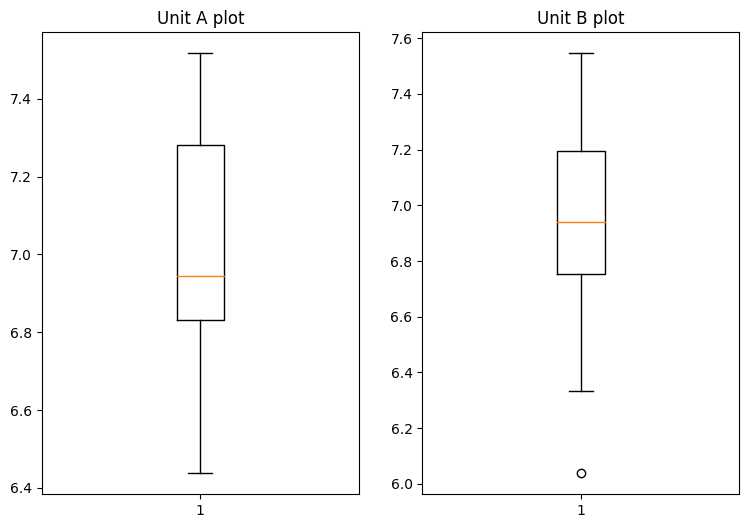

In [10]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A plot')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B plot')
plt.show()


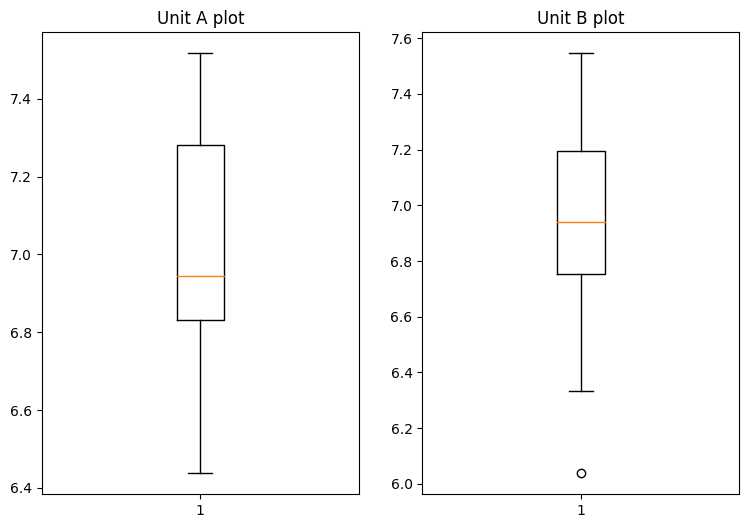

In [11]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A plot')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B plot')
plt.show()

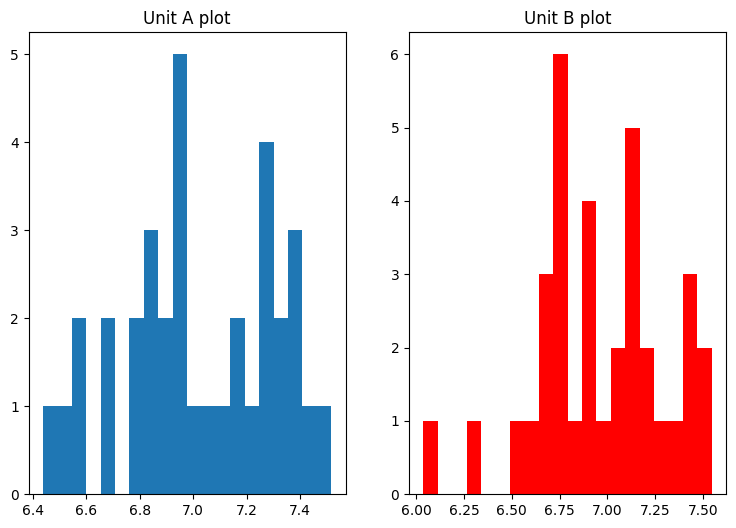

In [12]:
plt.subplots(figsize=(9,6))
plt.subplot(121)
plt.hist(cutlets['Unit A'],bins=20)
plt.title('Unit A plot')
plt.subplot(122)
plt.hist(cutlets['Unit B'],bins=20,color='r')
plt.title('Unit B plot')
plt.show()

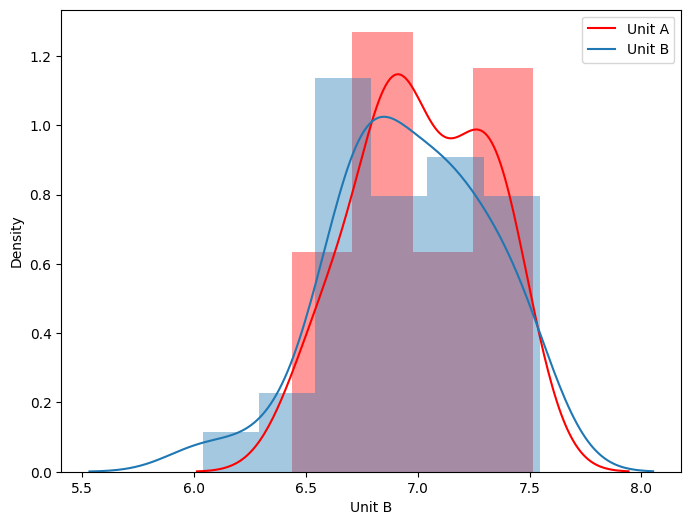

In [13]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'], kde = True,color='r')
sns.distplot(cutlets['Unit B'],hist=True)
plt.legend(labels)

In [14]:
p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)


Conclusion 🌏 as we can see the alpha value is equal with p-value we can not reject the null hypothesis.

there is no significant difference between two samples.

# **Question 2:-**A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.



In [15]:
lab=pd.read_csv('/content/LabTAT.csv')
lab.head(10)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
5,179.45,197.00,181.51,161.12
6,191.37,166.36,214.21,154.02
7,166.81,169.60,183.43,163.25
8,158.81,175.36,191.60,152.79
9,165.88,198.68,208.43,161.98


In [16]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [17]:
lab.info

<bound method DataFrame.info of      Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0          185.35        165.53        176.70        166.13
1          170.49        185.91        198.45        160.79
2          192.77        194.92        201.23        185.18
3          177.33        183.00        199.61        176.42
4          193.41        169.57        204.63        152.60
..            ...           ...           ...           ...
115        178.49        170.66        193.80        172.68
116        176.08        183.98        215.25        177.64
117        202.48        174.54        203.99        170.27
118        182.40        197.18        194.52        150.87
119        182.09        215.17        221.49        162.21

[120 rows x 4 columns]>

In [18]:
lab.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [19]:
lab[lab.duplicated()].shape

(0, 4)

In [20]:
lab[lab.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


In [21]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


Plotting the various plots .


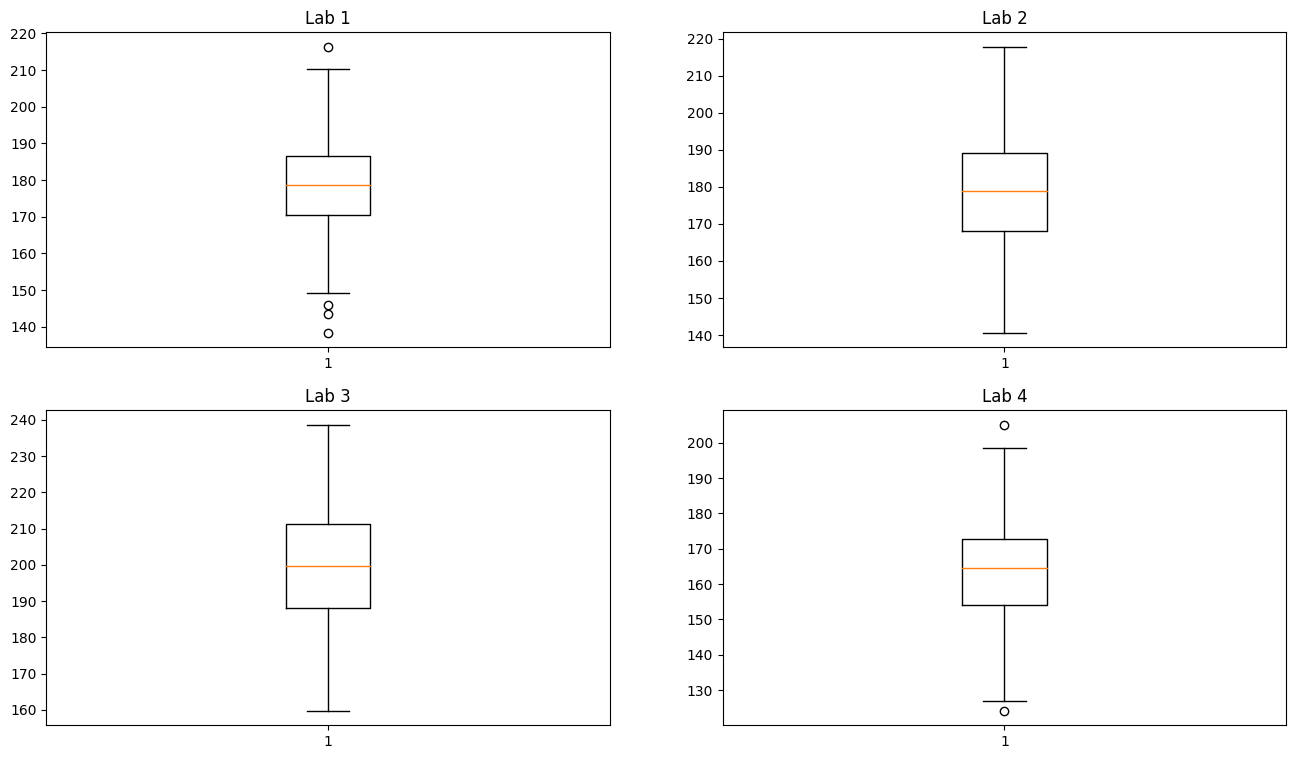

In [22]:
plt.subplots(figsize=(16,9))
plt.subplot(221)
plt.boxplot(lab['Laboratory 1'])
plt.title('Lab 1')
plt.subplot(222)
plt.boxplot(lab['Laboratory 2'])
plt.title('Lab 2')
plt.subplot(223)
plt.boxplot(lab['Laboratory 3'])
plt.title('Lab 3')
plt.subplot(224)
plt.boxplot(lab['Laboratory 4'])
plt.title('Lab 4')
plt.show()

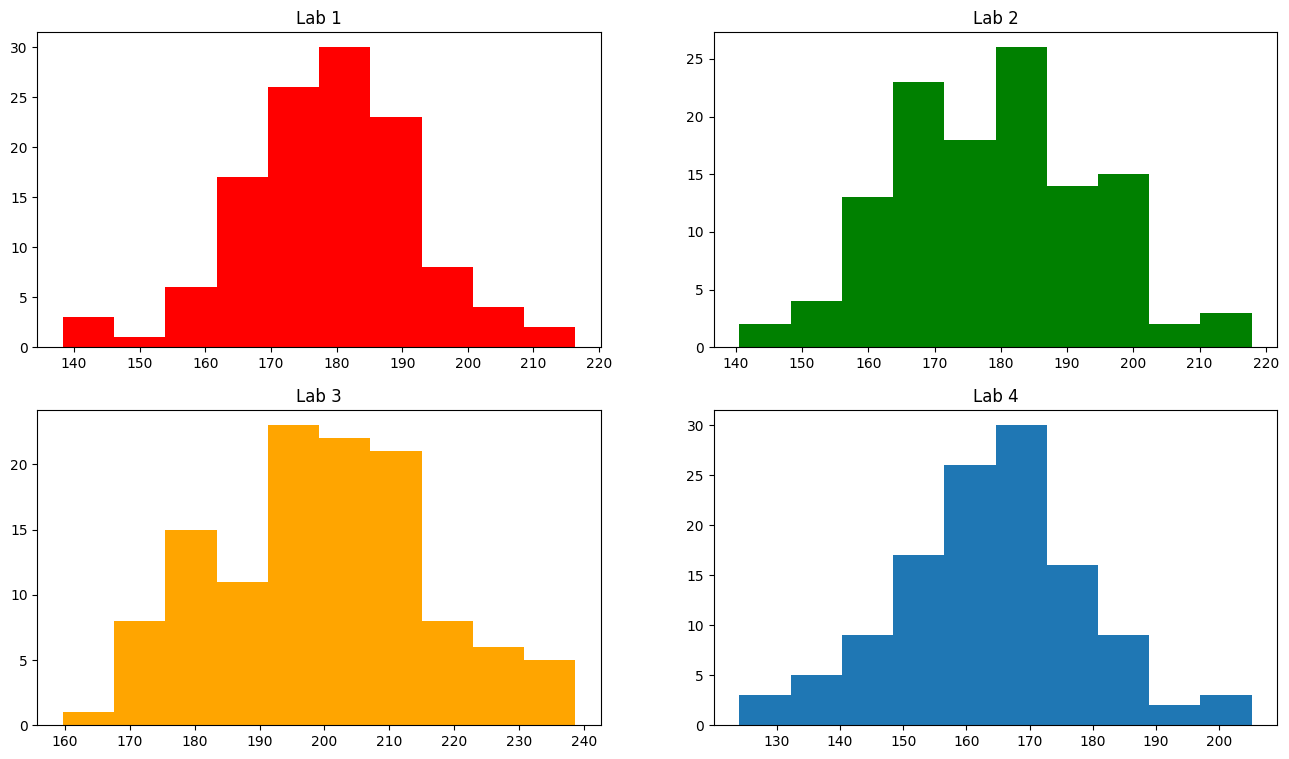

In [23]:
plt.subplots(figsize=(16,9))
plt.subplot(221)
plt.hist(lab['Laboratory 1'],color='r')
plt.title('Lab 1')
plt.subplot(222)
plt.hist(lab['Laboratory 2'],color='g')
plt.title('Lab 2')
plt.subplot(223)
plt.hist(lab['Laboratory 3'],color='orange')
plt.title('Lab 3')
plt.subplot(224)
plt.hist(lab['Laboratory 4'])
plt.title('Lab 4')
plt.show()

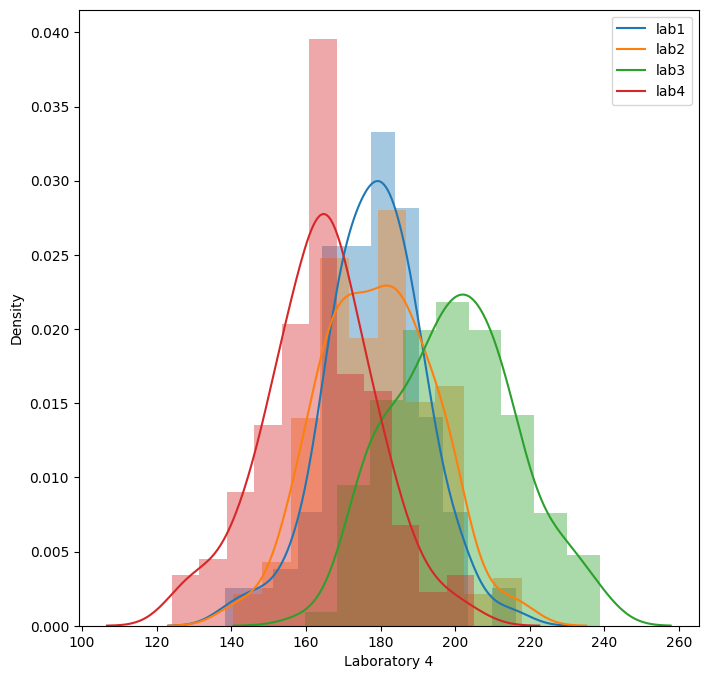

In [24]:
plt.figure(figsize=(8,8))
labels = ['lab1','lab2','lab3','lab4']
sns.distplot(lab['Laboratory 1'],kde=True)
sns.distplot(lab['Laboratory 2'],hist=True)
sns.distplot(lab['Laboratory 3'],hist=True)
sns.distplot(lab['Laboratory 4'],kde=True)
plt.legend(labels)
plt.show()

## **Plotting the Q-Q plot to check the distributio follows normal distribution or not**

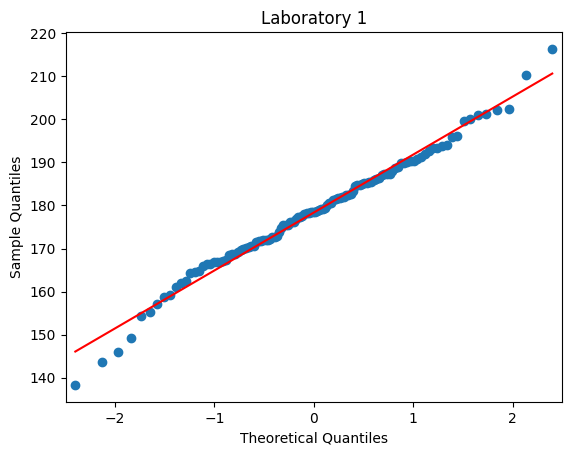

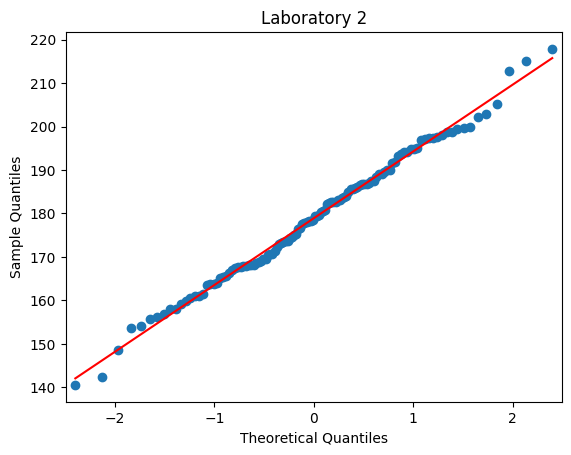

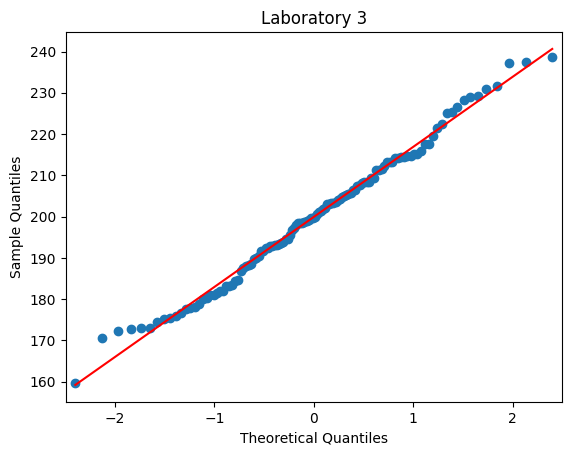

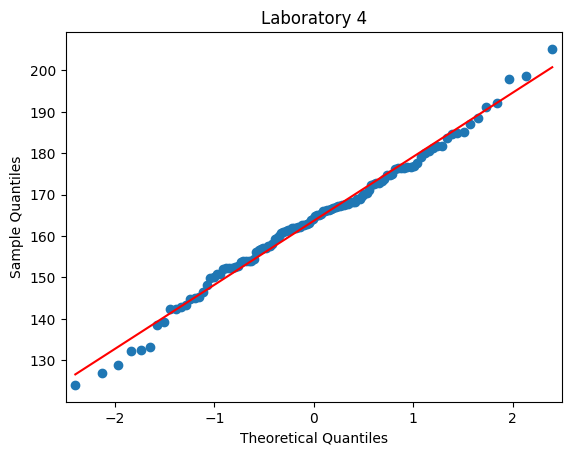

In [25]:
sm.qqplot(lab['Laboratory 1'], line = 'r')
plt.title('Laboratory 1')
sm.qqplot(lab['Laboratory 2'], line = 'r')
plt.title('Laboratory 2')
sm.qqplot(lab['Laboratory 3'], line = 'r')
plt.title('Laboratory 3')
sm.qqplot(lab['Laboratory 4'], line = 'r')
plt.title('Laboratory 4')
plt.show()

In [27]:
# Comparing the evidence using t-statistic
test_statistic , p_value = stats.f_oneway(lab.iloc[:,0],lab.iloc[:,1],lab.iloc[:,2],lab.iloc[:,3])
print('p-value = ',p_value)

p-value =  2.1156708949992414e-57


IF the p_value is greater than alpha value i.e=0.5 then we are going to reject the null hypothesis and accepting the alternative hypothesis.

So let's compare the values.

In [31]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis.')
else:
    print('We fail to reject Null hypothesis i.e we are accepting the null hypothesis.')

Significnace=0.050, p=0.000
We reject Null Hypothesis.


Conclusion: As we see there is no difference in the lab reports of the different laboratories.

So we are not taking no action.

# **QUESTION 3** ▶      Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


Step 1 ⏩ Null Hypothesis is we want to prove



In [33]:
buy = pd.read_csv('/content/BuyerRatio.csv', index_col = 0 )
buy

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [34]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

In [36]:
stat, p, dof, exp = stats.chi2_contingency(buy)
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [37]:
stats.chi2_contingency(table) # Here we are going to predict the future values of the elemendts in the array 'table'.

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [38]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [39]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


### If p_value is not equal to alpha we failed to reject Null Hypothesis because of lack of evidence
### If p_value is = alpha we reject Null Hypothesis.

In [40]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis ')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


As we see the alpha value is not equal to p-value and that's why we are not rejecting the null hypothesis.



# **QUESTION 4** ⏩



We are going to conduct a <font color="red">Test of Independence using Chi-Square </font> test with Contingency table

Here we have given the four mean values.

null hyypothesis:- $\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$

alternative hypothesis ▶ Atleast one of them is differentiate

In [43]:
cs = pd.read_csv('/content/Costomer+OrderForm.csv' )
cs

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


We are applying the descriptive statistics.

In [44]:
cs.info

<bound method DataFrame.info of     Phillippines   Indonesia       Malta       India
0     Error Free  Error Free   Defective  Error Free
1     Error Free  Error Free  Error Free   Defective
2     Error Free   Defective   Defective  Error Free
3     Error Free  Error Free  Error Free  Error Free
4     Error Free  Error Free   Defective  Error Free
..           ...         ...         ...         ...
295   Error Free  Error Free  Error Free  Error Free
296   Error Free  Error Free  Error Free  Error Free
297   Error Free  Error Free   Defective  Error Free
298   Error Free  Error Free  Error Free  Error Free
299   Error Free   Defective   Defective  Error Free

[300 rows x 4 columns]>

In [46]:
cs.shape

(300, 4)

Collect all the columns counts of Error Free and defective values counts like below shown command.

In [52]:
cs.value_counts(['Phillippines']) # Like this we are can check the count of each column

Phillippines
Error Free      271
Defective        29
dtype: int64

In [48]:
cs.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [50]:
cs.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [57]:
# Create the Contigency Table
ct = [[271,267,269,280], # Here are the Error Free values
                    [29,33,31,20]]       # Here are the Defective  values.
print(ct)

[[271, 267, 269, 280], [29, 33, 31, 20]]


In [58]:
stat = stats.chi2_contingency(ct)
stat

Chi2ContingencyResult(statistic=3.858960685820355, pvalue=0.2771020991233135, dof=3, expected_freq=array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]]))

We are puting the expected values and observed values below


In [59]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [60]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [62]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference.')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis


We Fail to reject null hypothesis beacause of lack of evidence.